In [9]:
#import all necessary libraries
import pandas as pd
import numpy as np
import os
import cv2
from tqdm import tqdm
from random import shuffle

In [10]:
TRAIN_DIR = r'C:\Users\bartf\Downloads\PROJECT\train'      #add your path
TEST_DIR = r'C:\Users\bartf\Downloads\PROJECT\train'              # add your test data path here
IMG_SIZE = 50               #image size
LR = 1e-3                    #learning rate


In [11]:
MODEL_NAME = 'dogsvscats-{}-{}.model'.format(LR,'6conv-basic-video')          # using 6 conv networks


In [12]:
def label_img(img):                   # labelling the images as 1 for cat and 0 for dog
    word_label = img.split('.')[-3]
    if word_label == 'cat' : return [1,0]
    elif word_label == 'dog': return [0,1]


In [13]:
def create_train_data():                            # training data is created 
    train_data = []
    for img in tqdm(os.listdir(TRAIN_DIR)):
        label = label_img(img)
        path = os.path.join(TRAIN_DIR,img)
        img = cv2.resize(cv2.imread(path,cv2.IMREAD_GRAYSCALE),(IMG_SIZE,IMG_SIZE))
        train_data.append([np.array(img),np.array(label)])
    shuffle(train_data)
    np.save('train_data.npy',train_data)
    return train_data

In [14]:
def process_test_data():                        #processing the test data
    test_data = []
    for img in tqdm(os.listdir(TEST_DIR)):
        path = os.path.join(TEST_DIR,img)
        img_num = img.split('.')[0]
        img = cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE),(IMG_SIZE,IMG_SIZE))
        test_data.append([np.array(img),img_num])
    np.save('test_data.npy',test_data)
    return test_data


In [15]:
train_data = create_train_data()            
#train_data = np.load('train_data.npy')

100%|███████████████████████████████████████████████████████████████████████████| 17147/17147 [02:07<00:00, 134.23it/s]
G:\Anaconda\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [16]:

import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression
import tflearn.datasets.mnist as mnist

# creating the convolution network 

convnet = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 1], name='input')

convnet = conv_2d(convnet, 32, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 32, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 32, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)

convnet = fully_connected(convnet, 2, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnet, tensorboard_dir = 'log')        # all the graphs related to accuracy test data and train data, loss and validation loss are created in tensorboard


Instructions for updating:
non-resource variables are not supported in the long term
curses is not supported on this machine (please install/reinstall curses for an optimal experience)
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [17]:
if os.path.exists('{}.meta'.format(MODEL_NAME)):
    model.load(MODEL_NAME) 
    print('model_loaded')

In [18]:
train = train_data[:-500]            #splitting the test and train data set
test = train_data[-500:]


In [19]:
#reshaping the data set according to the conv network
X  = np.array([i[0] for i in train]).reshape(-1, IMG_SIZE, IMG_SIZE,1)
Y =  [i[1] for i in train]

test_x  = np.array([i[0] for i in test]).reshape(-1, IMG_SIZE, IMG_SIZE,1)
test_y =  [i[1] for i in test]

In [20]:
model.fit({'input': X}, {'targets': Y}, n_epoch=5, validation_set=({'input': test_x}, {'targets': test_y}),   #fitting the model to our data set
    snapshot_step=500, show_metric=True, run_id=MODEL_NAME)

Training Step: 1304  | total loss: 0.51189 | time: 19.676s
| Adam | epoch: 005 | loss: 0.51189 - acc: 0.7616 -- iter: 16640/16647
Training Step: 1305  | total loss: 0.51275 | time: 20.760s
| Adam | epoch: 005 | loss: 0.51275 - acc: 0.7589 | val_loss: 0.52401 - val_acc: 0.7380 -- iter: 16647/16647
--


In [21]:
pred_y = model.predict(test_x)           #predicted values

Actual Image depicts : cat
Model Predicted that the image is cat with 74.0% accuracy


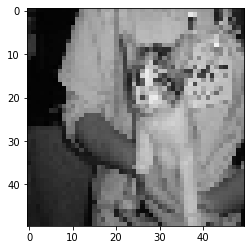

############################################################
Actual Image depicts : cat
Model Predicted that the image is cat with 85.0% accuracy


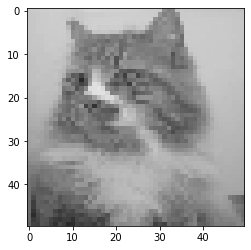

############################################################
Actual Image depicts : cat
Model Predicted that the image is cat with 73.0% accuracy


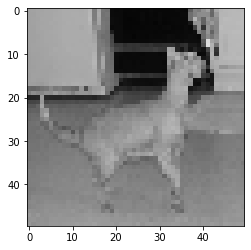

############################################################
Actual Image depicts : cat
Model Predicted that the image is cat with 72.0% accuracy


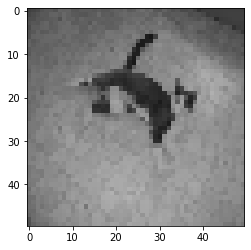

############################################################
Actual Image depicts : cat
Model Predicted that the image is cat with 77.0% accuracy


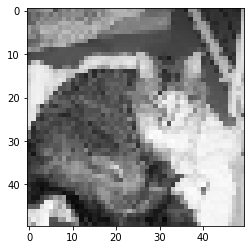

############################################################
Actual Image depicts : cat
Model Predicted that the image is cat with 56.99999999999999% accuracy


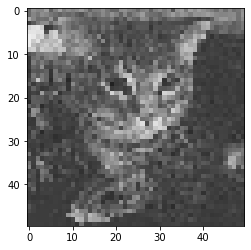

############################################################
Actual Image depicts : dog
Model Predicted that the image is dog with 88.0% accuracy


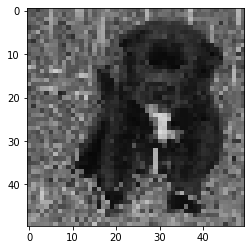

############################################################
Actual Image depicts : cat
Model Predicted that the image is cat with 59.0% accuracy


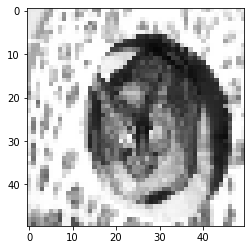

############################################################
Actual Image depicts : cat
Model Predicted that the image is cat with 52.0% accuracy


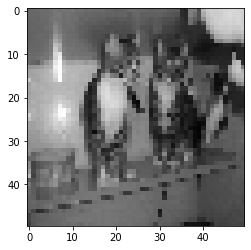

############################################################
Actual Image depicts : cat
Model Predicted that the image is cat with 99.0% accuracy


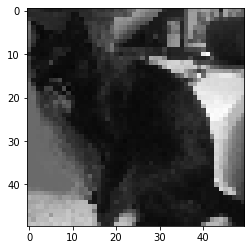

############################################################


In [22]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import random

orig= ""
pred= ""

for i in range(0,10):
    index = random.randint(0,500)
    if test_y[index][0]>test_y[index][1]:
        orig= 'cat'
    else:
        orig= 'dog'
    print("Actual Image depicts : "+ orig )
    if pred_y[index][0]>pred_y[index][1]:
        pred= 'cat'
    else:
        pred= 'dog'
    print("Model Predicted that the image is "+ pred +" with "+str(100*float("{:.2f}".format(max(pred_y[index][0],pred_y[index][1]))))+"% accuracy")
    plt.imshow( cv2.cvtColor(test_x[index],cv2.COLOR_GRAY2RGB)  )
    plt.show()
    print(60*'#')
    


